In [1]:
# importing modules

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
import pickle
import joblib
import os
import gc
import seaborn as sb
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix


physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

tf.test.gpu_device_name()
tf.device('/GPU:0')

2024-11-29 11:08:14.985764: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-11-29 11:08:17.945920: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-11-29 11:08:19.021775: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-29 11:08:19.021852: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3070 Ti Laptop GPU computeCapability: 8.6
coreClock: 1.035GHz coreCount: 46 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 357.69GiB/s
2024-11-29 11:08:19.021909: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-11-29 11:08:19.029442: I tensorflo

In [2]:
num_classes = 19 #0 - 18
np.random.seed(441) #setting seed
img_rows, img_cols = 28, 58 #image dimensions

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

X = np.concatenate([x_train, x_test])
Y = np.concatenate([y_train, y_test])

X = X.astype('float32')
X /= 255

def dataset(X, Y, output=100000):
    pairs_per_combination = output//100
    imgs = []
    labels = []
    l1 = []
    l2 = []
    sample_idx=0
    for i in range(10):
        for j in range(10):
            idxl1 = np.where(Y == i)[0]
            idxl2 = np.where(Y == j)[0]
            for k in range(pairs_per_combination):
                idx1 = np.random.choice(idxl1)
                idx2 = np.random.choice(idxl2)
                combined_img = np.hstack((X[idx1], X[idx2]))
                combined_label = i+j
                imgs.append(combined_img)
                labels.append(combined_label)
                l1.append(i)
                l2.append(j)
            sample_idx += 1
    shuffle_idx = np.random.permutation((len(imgs)))
    imgs = np.array(imgs)[shuffle_idx]
    labels = np.array(labels)[shuffle_idx]
    l1 = np.array(l1)[shuffle_idx]
    l2 = np.array(l2)[shuffle_idx]
    return imgs, labels, l1, l2

X, Y, D1, D2 = dataset(X, Y, output=80000)

X = X.reshape(X.shape[0], -1)

In [4]:
train_ratio = 0.8
test_ratio = 0.2

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=(1-train_ratio), random_state=441)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train shape: (40000, 1568)
x_test shape: (10000, 1568)
y_train shape: (40000,)
40000 train samples
10000 test samples


In [5]:
with open('x_train_inf.pickle', 'wb') as f:
    pickle.dump(x_train, f)

with open('y_train_inf.pickle', 'wb') as f:
    pickle.dump(y_train, f)
    
with open('x_test_inf.pickle', 'wb') as f:
    pickle.dump(x_test, f)
    
with open('y_test_inf.pickle', 'wb') as f:
    pickle.dump(y_test, f)

In [6]:
with open('x_train_inf.pickle', 'rb') as f:
    x_train = pickle.load(f)

with open('y_train_inf.pickle', 'rb') as f:
    y_train = pickle.load(f)
    
with open('x_test_inf.pickle', 'rb') as f:
    x_test = pickle.load(f)
    
with open('y_test_inf.pickle', 'rb') as f:
    y_test = pickle.load(f)

In [7]:
svcClass = SVC(gamma='auto', verbose=True, shrinking=False))
svcClass.fit(x_train, np.argmax(y_train, axis=1))
svcPred = svcClass.predict(x_test)
score = svcClass.score(x_test, np.argmax(y_test, axis=1))
print(score)

[LibSVM]*
optimization finished, #iter = 318
obj = -194.693359, rho = 0.659358
nSV = 336, nBSV = 280
*
optimization finished, #iter = 379
obj = -350.831981, rho = 1.515071
nSV = 521, nBSV = 471
*
optimization finished, #iter = 403
obj = -345.340626, rho = 1.497739
nSV = 525, nBSV = 471
*
optimization finished, #iter = 397
obj = -284.310751, rho = 1.485306
nSV = 462, nBSV = 401
*
optimization finished, #iter = 448
obj = -441.606517, rho = 1.674021
nSV = 635, nBSV = 580
*
optimization finished, #iter = 441
obj = -369.450176, rho = 1.606826
nSV = 550, nBSV = 496
*
optimization finished, #iter = 399
obj = -321.498232, rho = 1.816406
nSV = 491, nBSV = 430
*
optimization finished, #iter = 445
obj = -347.807023, rho = 1.602069
nSV = 536, nBSV = 471
*
optimization finished, #iter = 372
obj = -316.349191, rho = 1.479812
nSV = 487, nBSV = 438
*
optimization finished, #iter = 308
obj = -181.934161, rho = 1.230385
nSV = 316, nBSV = 249
*
optimization finished, #iter = 303
obj = -185.074923, rho = 

In [8]:
with open("svm_model.pkl", "wb") as f:
    pickle.dump(svcClass, f)

In [9]:
loaded = pickle.load(open("svm_model.pkl", "rb"))

In [10]:
svcPred = loaded.predict(x_test)
score = loaded.score(x_test, np.argmax(y_test, axis=1))
print(score)

0.3007


<AxesSubplot: >

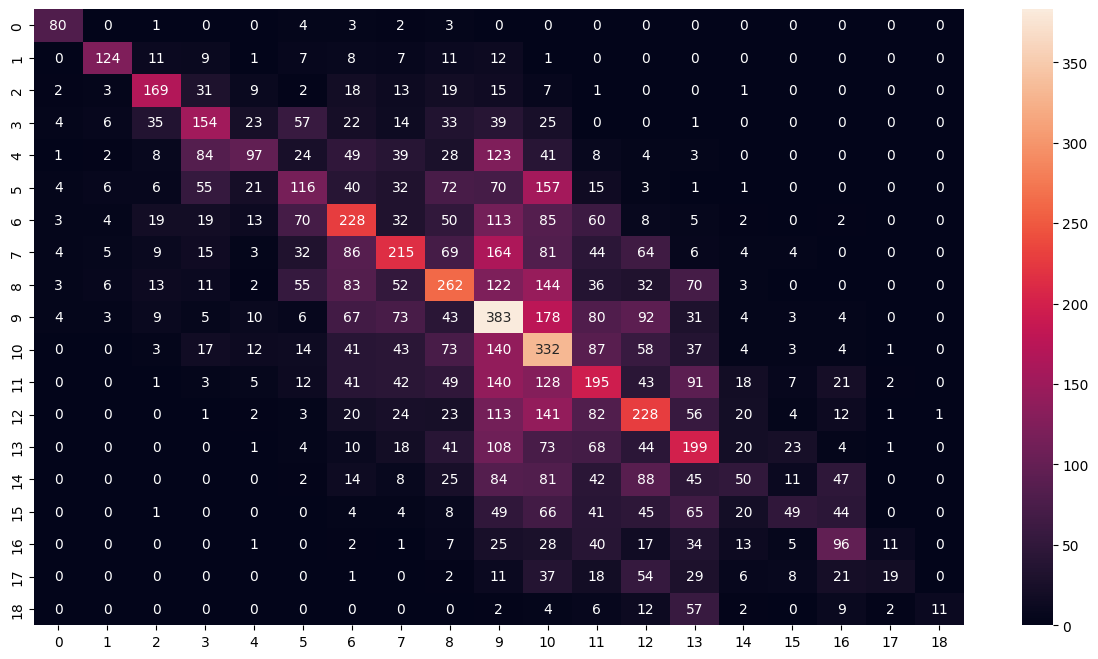

In [11]:
confusion = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=svcPred)
plt.subplots(figsize=(15, 8))
sb.heatmap(confusion, annot=True, fmt='g')

In [ ]:
linsvcClass = LinearSVC(penalty='l2', C = 1, multi_class='ovr', verbose=1)
linsvcClass.fit(x_train, np.argmax(y_train, axis=1))
linsvcPred = linsvcClass.predict(x_test)
score = linsvcClass.score(x_test, np.argmax(y_test, axis=1))
print(score)

In [9]:
forestClass = RandomForestClassifier(max_depth=200)
forestClass.fit(x_train, np.argmax(y_train, axis=1))
forestPred = forestClass.predict(x_test)
score = forestClass.score(x_test, np.argmax(y_test, axis=1))
print(score)

0.7707


In [10]:
# with open("forest.pkl", 'wb') as f:
#     pickle.dump(forestClass, f)

: 

In [ ]:
forestPred = loaded.predict(x_test)
score = loaded.score(x_test, np.argmax(y_test, axis=1))
print(score)

In [ ]:
confusion = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=forestPred)
plt.subplots(figsize=(15, 8))
sb.heatmap(confusion, annot=True, fmt='g')